In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
dataset_name = '20210327_SnyderCut'
data = pd.read_csv('./datasets/cleaned/' + dataset_name + '.csv')

# Word Cloud

In [3]:
# all tweets into one str

words = ' '

for i in data.text:
    i = str(i)
    separate = i.split()
    for j in range(len(separate)):
        separate[j] = separate[j].lower()

    words += " ".join(separate) + " "

In [4]:
wordcloud = WordCloud(
    background_color='white',
    max_words=200,
    max_font_size=40,
    stopwords=STOPWORDS,
    scale=3,
    random_state=42
).generate(words)

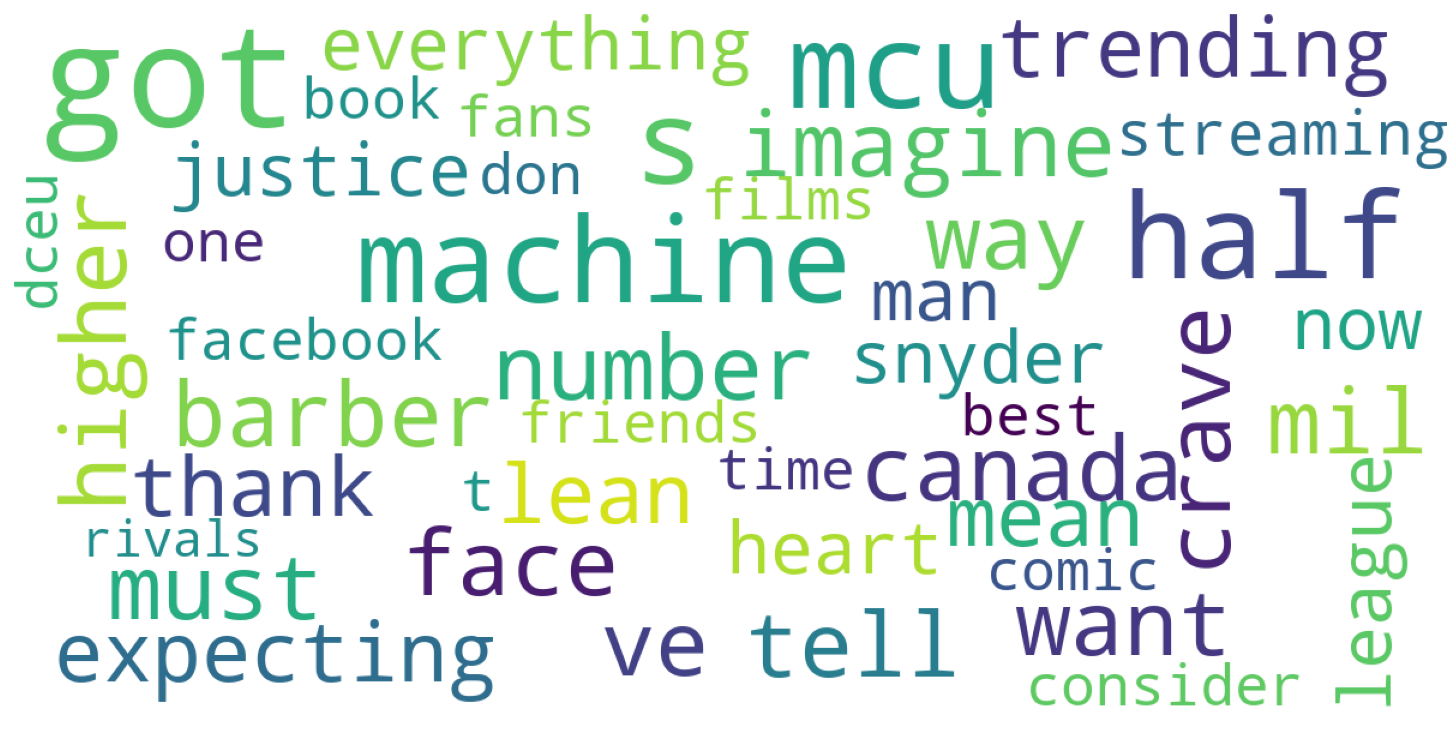

In [5]:
plt.figure(figsize=(20,20), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [6]:
plt_name = dataset_name + '_wc.png'
plt.savefig('./visualizations/wordclouds/' + plt_name, dpi=300, bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

# Locations

In [7]:
location = data['location']
print('No. of distinct locations listed by twitter users is:', len(location.value_counts()))
unique_locations = location.value_counts()
# Remove n.a.
unique_locations = pd.DataFrame({'locations': unique_locations.index,
                                'count': unique_locations.values})
unique_locations.drop(0, inplace = True)
# See top 20 locations
unique_locations.sort_values(by = 'count', ascending = False).head()

No. of distinct locations listed by twitter users is: 3


,locations,count
1,Northern California,1
2,"Los Angeles, CA",1


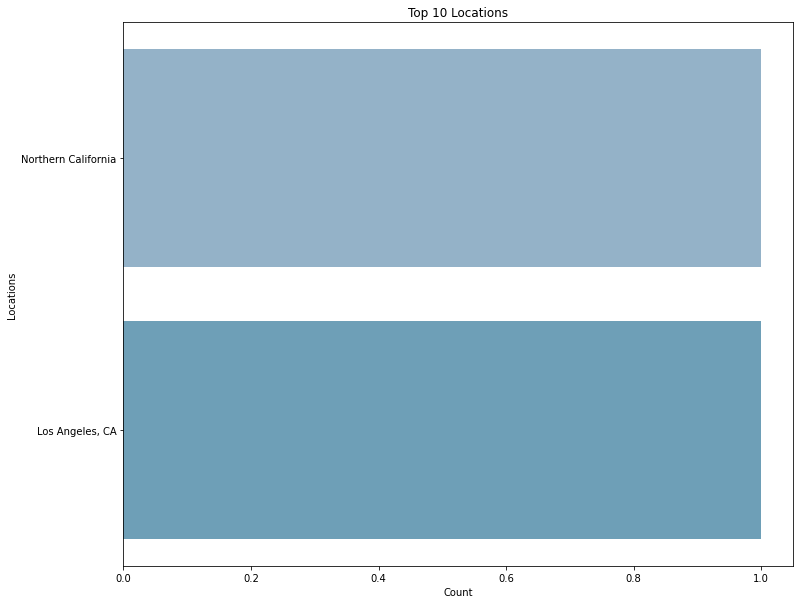

In [8]:
# Focus on top 20 locations first
# Convert any possible str to int/numeric first
count = pd.to_numeric(unique_locations['count'])
unique_locations['count'] = count
unique_locations = unique_locations.head(10)
# Plot a bar plot
plt.figure(figsize=(12,10))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'count', y = 'locations', orient = 'h',data = unique_locations)
plt.xlabel('Count')
plt.ylabel('Locations')
plt.title('Top 10 Locations')

plt.show()

In [9]:
plt_name = dataset_name + '_locations.png'
plt.savefig('./visualizations/locationsdemographics/' + plt_name, dpi = 300, bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>